In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keras.layers import (Activation, Conv3D, Dense, Dropout, Flatten,MaxPooling3D)
from keras.models import Sequential
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns
from PIL import Image



C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
I = plt.imread(r'Images/study_area_edited_paper.png')
#plt.imshow(I)

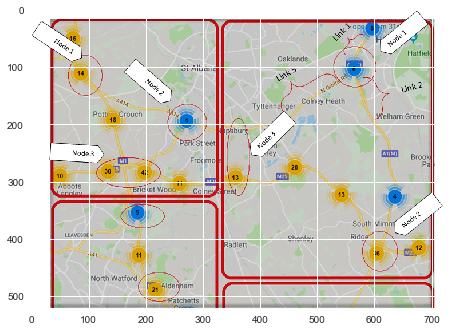

In [3]:
plt.imshow(I)

# Patch 1

In [4]:
path=r"I:\personal\Laptop G\G laptop folder\My Projects\Jupyter\PhD Implemntation\15 min tabular\P1\N1\L1"
os.chdir(path)

In [5]:
print(os.getcwd())

I:\personal\Laptop G\G laptop folder\My Projects\Jupyter\PhD Implemntation\15 min tabular\P1\N1\L1


# N1-> L1-in,L1-out

In [6]:

N1_L1_in =pd.read_csv("in(516105;202781).csv",header=0,index_col=0)
N1_L1_out =pd.read_csv("out(516005;202787).csv",header=0,index_col=0)



In [7]:

### missing value imputation using back fill propogation calculated columnwise

'''fill_NaN = Imputer(missing_values=np.nan, strategy='mean', axis=0,verbose=1)
imputed_N1_L1_in = pd.DataFrame(fill_NaN.fit_transform(N1_L1_in))
imputed_N1_L1_in.columns = N1_L1_in.columns
imputed_N1_L1_in.index = N1_L1_in.index

fill_NaN1 = Imputer(missing_values=np.nan, strategy='mean', axis=0,verbose=1)
imputed_N1_L1_out = pd.DataFrame(fill_NaN1.fit_transform(N1_L1_out))
imputed_N1_L1_out.columns = N1_L1_out.columns
imputed_N1_L1_out.index = N1_L1_out.index'''

N1_L1_in.fillna(method='bfill',axis=0,inplace=True)
N1_L1_out.fillna(method='bfill',axis=0,inplace=True)


In [8]:
print(N1_L1_in.describe())
print(N1_L1_out.describe())

            00:00       00:15       00:30       00:45       01:00       01:15  \
count  271.000000  271.000000  271.000000  271.000000  271.000000  271.000000   
mean   204.848708  189.952030  176.656827  162.771218  149.095941  136.955720   
std     43.491455   43.856263   39.662702   36.343516   31.119811   28.569698   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    180.000000  162.500000  153.000000  140.500000  130.000000  122.000000   
50%    197.000000  182.000000  169.000000  156.000000  147.000000  136.000000   
75%    229.500000  212.500000  196.500000  185.500000  166.000000  152.000000   
max    327.000000  347.000000  298.000000  273.000000  235.000000  244.000000   

            01:30       01:45       02:00       02:15      ...       \
count  271.000000  271.000000  271.000000  271.000000      ...        
mean   128.188192  122.848708  112.335793  106.940959      ...        
std     26.107286   28.157020   23.545263   23.389223    

#  Plotting Flows w.r.t Time of the Day

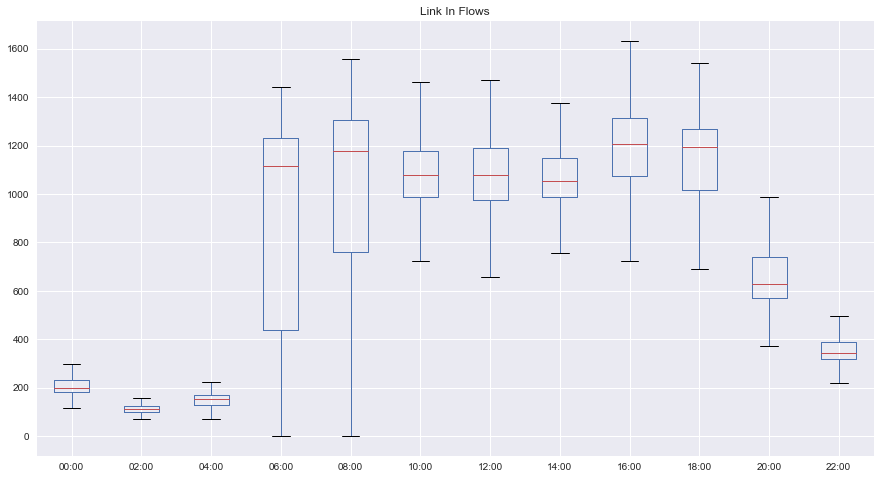

In [9]:
N1_L1_in.plot(kind='box', y=['00:00','02:00','04:00','06:00','08:00','10:00','12:00',
       '14:00',
       '16:00',
       '18:00',
       '20:00', 
       '22:00'] ,figsize=(15,8), grid=True ,subplots=False,layout=(6, 2),sharex=True, sharey=True,title='Link In Flows')

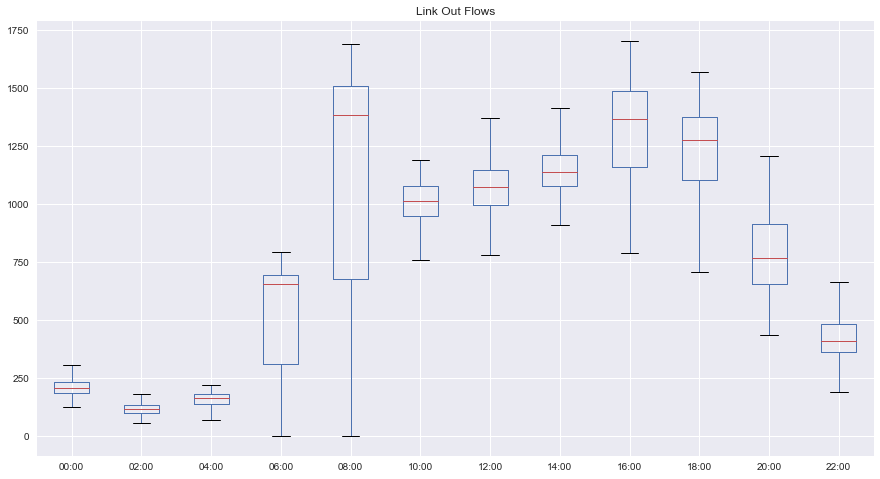

In [10]:
N1_L1_out.plot(kind='box', y=['00:00','02:00','04:00','06:00','08:00','10:00','12:00',
       '14:00',
       '16:00',
       '18:00',
       '20:00', 
       '22:00'] ,figsize=(15,8), grid=True ,subplots=False,layout=(6, 2),sharex=True, sharey=True,title='Link Out Flows')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F511E97B8>,
      dtype=object)

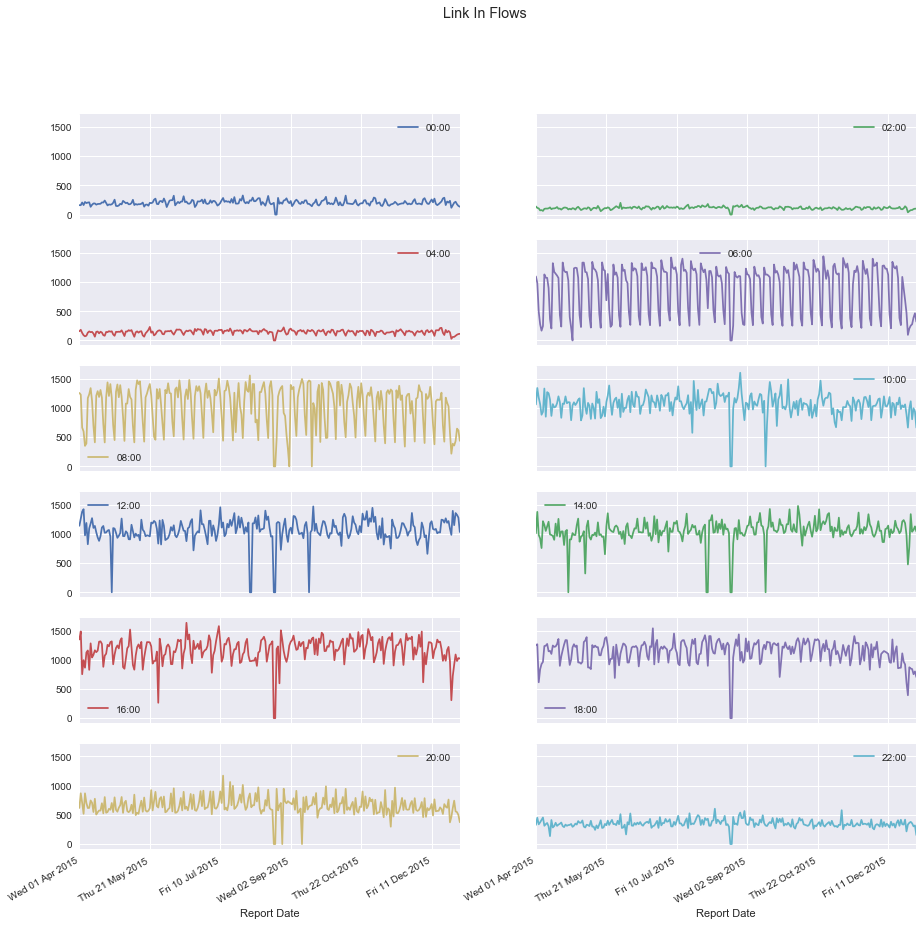

In [11]:

N1_L1_in.plot(x=N1_L1_in.index, y=['00:00','02:00','04:00','06:00','08:00','10:00','12:00',
       '14:00',
       '16:00',
       '18:00',
       '20:00', 
       '22:00'] ,figsize=(15,15), grid=True ,subplots=True,layout=(6, 2),sharex=True, sharey=True,title='Link In Flows')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F52339358>,
      dtype=object)

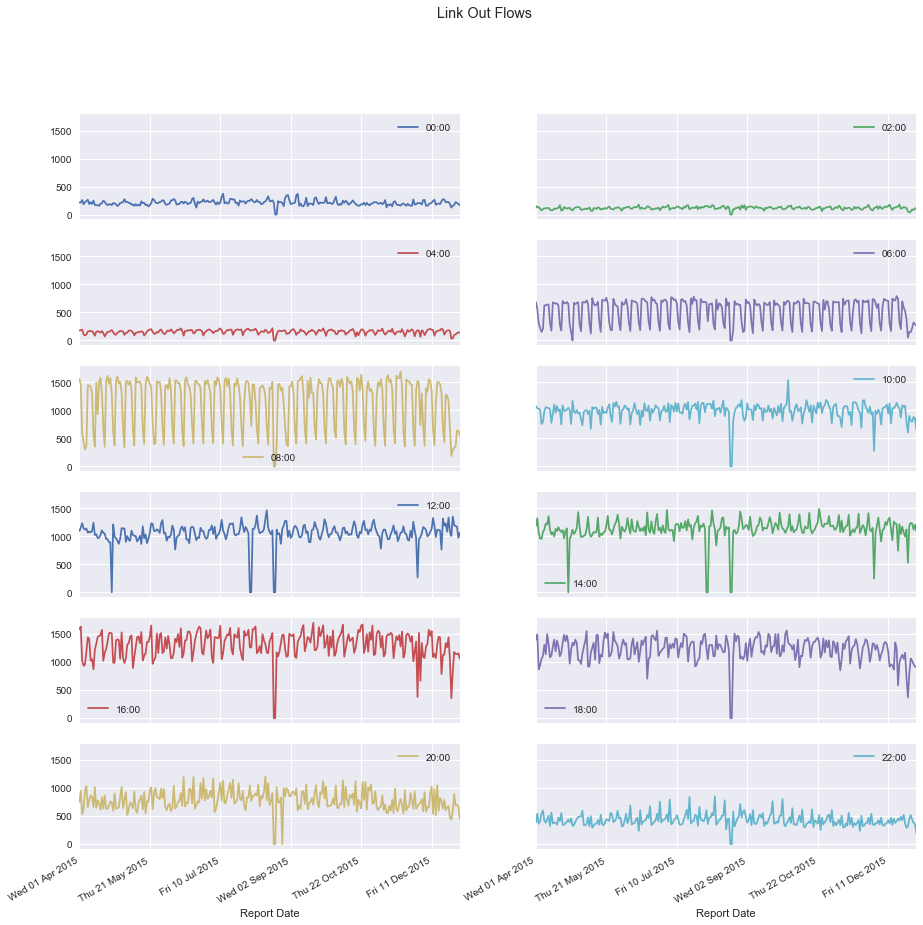

In [12]:
N1_L1_out.plot(x=N1_L1_out.index, y=['00:00','02:00','04:00','06:00','08:00','10:00','12:00',
       '14:00',
       '16:00',
       '18:00',
       '20:00', 
       '22:00'] ,figsize=(15,15), grid=True ,subplots=True,layout=(6, 2),sharex=True, sharey=True,title='Link Out Flows')

# Plotting Flows w.r.t Days of  Week

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F52D66390>,
      dtype=object)

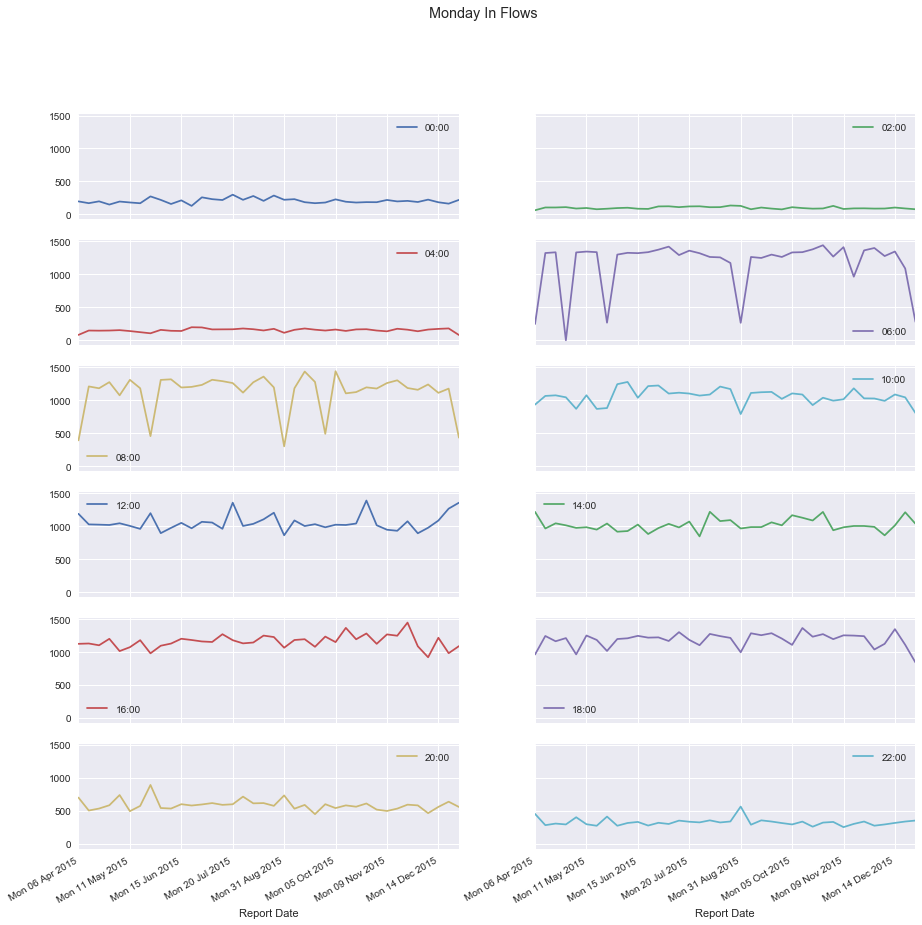

In [13]:

_list = ('Mon')
N1_L1_in[N1_L1_in.index.str.contains(_list)].plot(y=['00:00','02:00','04:00','06:00','08:00','10:00','12:00',
       '14:00',
       '16:00',
       '18:00',
       '20:00', 
       '22:00'] ,figsize=(15,15), grid=True ,subplots=True,layout=(6, 2),sharex=True, sharey=True , title='Monday In Flows')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F5496DF60>,
      dtype=object)

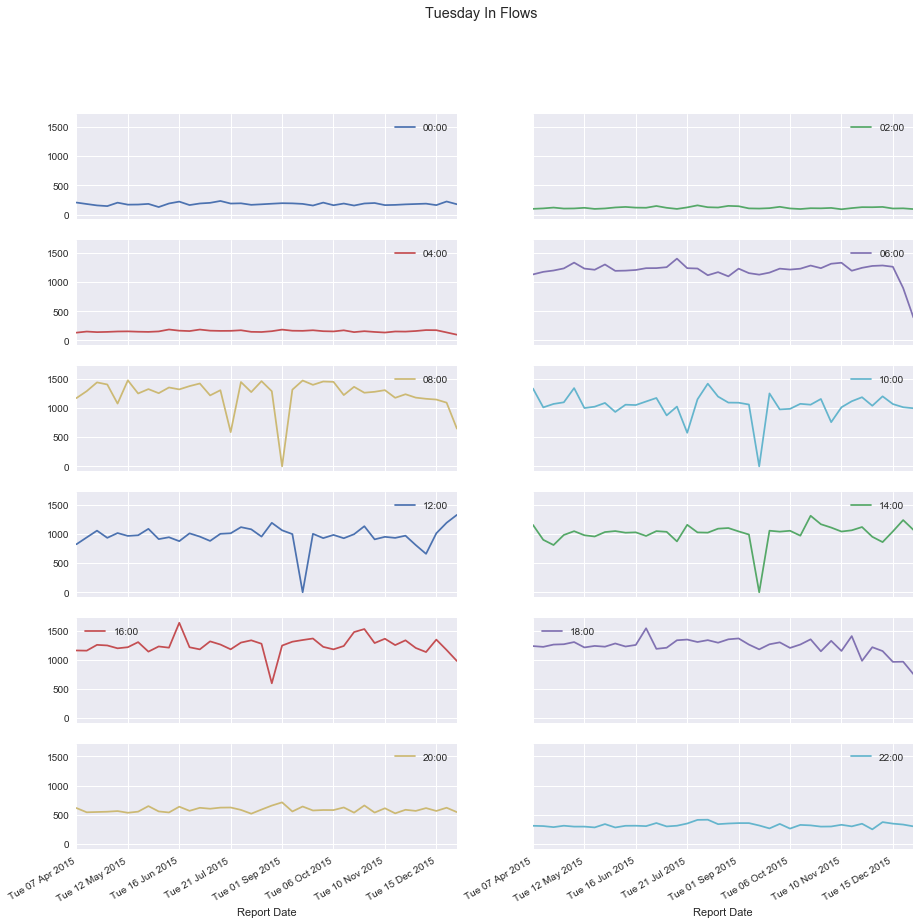

In [14]:
_list = ('Tue')
N1_L1_in[N1_L1_in.index.str.contains(_list)].plot(y=['00:00','02:00','04:00','06:00','08:00','10:00','12:00',
       '14:00',
       '16:00',
       '18:00',
       '20:00', 
       '22:00'] ,figsize=(15,15), grid=True ,subplots=True,layout=(6, 2),sharex=True, sharey=True, title='Tuesday In Flows')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F5557B828>,
      dtype=object)

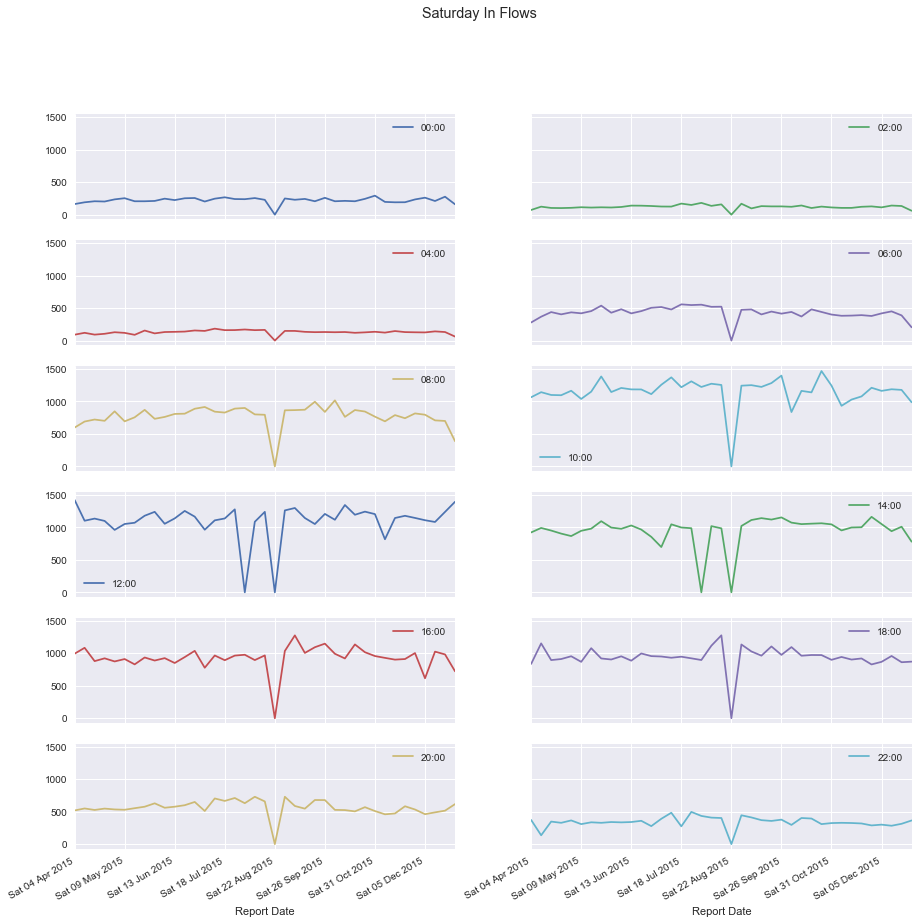

In [15]:

_list = ('Sat')
N1_L1_in[N1_L1_in.index.str.contains(_list)].plot(y=['00:00','02:00','04:00','06:00','08:00','10:00','12:00',
       '14:00',
       '16:00',
       '18:00',
       '20:00', 
       '22:00'] ,figsize=(15,15), grid=True ,subplots=True,layout=(6, 2),sharex=True, sharey=True, title='Saturday In Flows')

In [16]:
# finding mean with respect to the day of the week
a_in={}
_list = ('Mon','Tue','Wed','Thu','Fri','Sat','Sun')
N1_L1_in_filtered=N1_L1_in.filter(items=['00:00','02:00','04:00','06:00','08:00','10:00','12:00','14:00','16:00','18:00','20:00','22:00'])
for i in _list:
     a_in[i]=(N1_L1_in_filtered[N1_L1_in_filtered.index.str.contains(i)].mean(axis=0))
    

In [17]:
# finding mean with respect to the day of the week
a_out={}
_list = ('Mon','Tue','Wed','Thu','Fri','Sat','Sun')
N1_L1_out_filtered=N1_L1_out.filter(items=['00:00','02:00','04:00','06:00','08:00','10:00','12:00','14:00','16:00','18:00','20:00','22:00'])
for i in _list:
     a_out[i]=(N1_L1_out_filtered[N1_L1_out_filtered.index.str.contains(i)].mean(axis=0))

In [18]:
# finding mean with respect to the month of the year
b={}
_list = ('Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
N1_L1_in_filtered=N1_L1_in.filter(items=['00:00','02:00','04:00','06:00','08:00','10:00','12:00','14:00','16:00','18:00','20:00','22:00'])
for i in _list:
     b[i]=(N1_L1_in_filtered[N1_L1_in_filtered.index.str.contains(i)].mean(axis=0))
    

In [19]:
a_in=pd.DataFrame(a_in)
a_out=pd.DataFrame(a_out)
b=pd.DataFrame(b)
# sorting the days and months in respective frames
a_in = a_in.reindex(columns=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
a_out = a_out.reindex(columns=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
b = b.reindex(columns=['Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

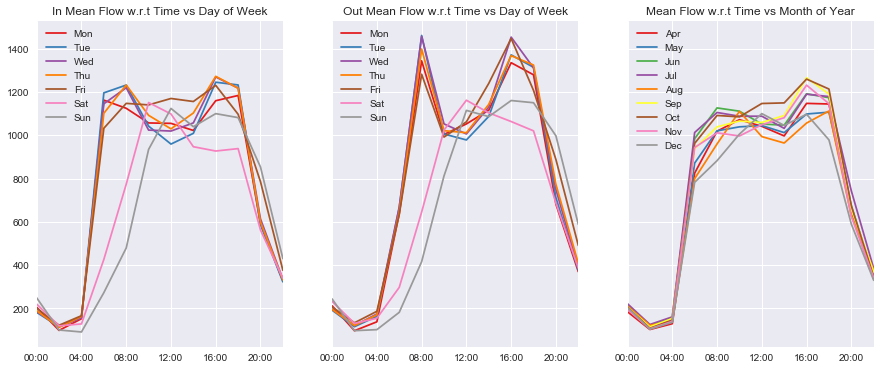

In [20]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharex=True,sharey=True,figsize=(15,6))
a_in.plot(ax=ax1,title='In Mean Flow w.r.t Time vs Day of Week',colormap='Set1')
a_out.plot(ax=ax2,title='Out Mean Flow w.r.t Time vs Day of Week',colormap='Set1')
b.plot(ax=ax3,title='Mean Flow w.r.t Time vs Month of Year',colormap='Set1')

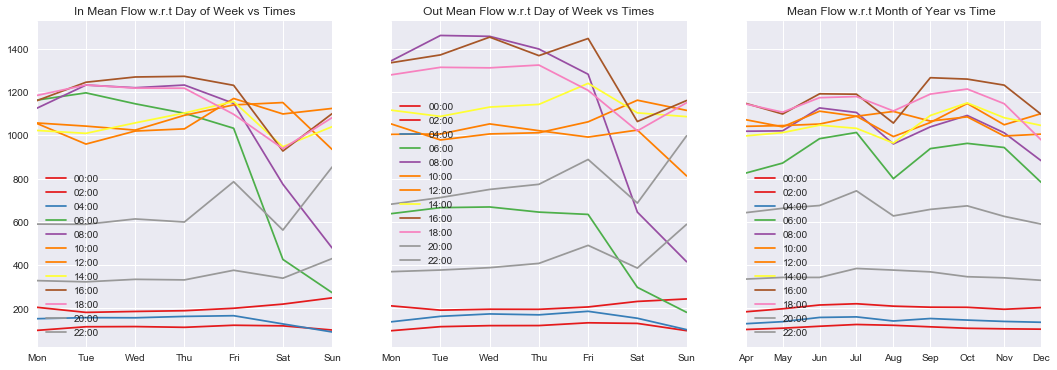

In [21]:
#plotting with respect to the time of the days and months
f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharex=False,sharey=True,figsize=(18,6))
a_in.T.plot(ax=ax1,title='In Mean Flow w.r.t Day of Week vs Times',colormap='Set1')
a_out.T.plot(ax=ax2,title='Out Mean Flow w.r.t Day of Week vs Times',colormap='Set1')
b.T.plot(ax=ax3,title='Mean Flow w.r.t Month of Year vs Time ',colormap='Set1')


# Normalising For Maximum Column (interval in a day)  value

In [22]:
a_in_scaled=(a_in.astype('float32')) / (np.max(a_in.astype('float32')))
a_out_scaled=(a_out.astype('float32')) / (np.max(a_out.astype('float32')))

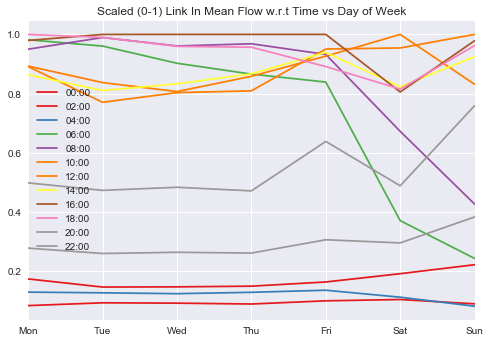

In [23]:
a_in_scaled.T.plot(title='Scaled (0-1) Link In Mean Flow w.r.t Time vs Day of Week',colormap='Set1')

#  Converting Flows To Images

In [24]:
# converting in range (0-255) with grayscale
a_in_img = Image.fromarray(a_in_scaled.T.values.astype('float32'),'L')
#a_in_img = a_in_img.resize((64, 64), Image.ANTIALIAS)

a_out_img = Image.fromarray(a_out_scaled.T.values.astype('float32'), 'L')
#a_out_img = a_out_img.resize((64, 64), Image.ANTIALIAS)



print (type(a_in_img)) 

<class 'PIL.Image.Image'>


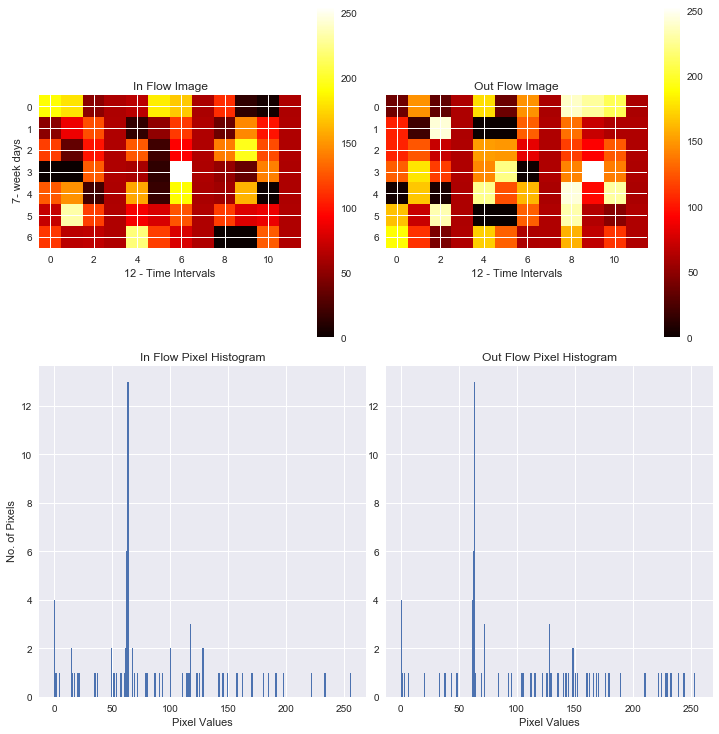

In [25]:
fig = plt.figure(figsize=(10,10))

plt.subplot(221)
plt.tight_layout()
plt.title('In Flow Image')
plt.imshow(a_in_img, cmap='hot',interpolation='none')
a_in_img.save('inflow.png')
plt.colorbar()
plt.xlabel('12 - Time Intervals')
plt.ylabel(' 7- week days')

plt.subplot(222)
plt.imshow(a_out_img, cmap='hot',interpolation='none')
plt.colorbar()
plt.title('Out Flow Image')
plt.xlabel('12 - Time Intervals')


plt.subplot(223)
plt.hist(np.ravel(a_in_img),256,[0,256])
plt.title('In Flow Pixel Histogram')
plt.xlabel('Pixel Values')
plt.ylabel(' No. of Pixels')

plt.subplot(224)
plt.hist(np.ravel(a_out_img),256,[0,256])
plt.title('Out Flow Pixel Histogram')
plt.xlabel('Pixel Values')





plt.show()


In [26]:
print(np.max(a_in_img),np.min(a_in_img))
print(np.max(a_out_img),np.min(a_out_img))

255 0
253 0
